## Importing the Data

In [1]:
import pandas as pd 

df = pd.read_csv("../data/raw/Toyota_Data.csv")

df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409


## Definitions
- **Date** : the date of the trading
- **Adj Close** : Adjusted closing price of the stock after accounting for splits and dividends.
- **Close** : Closing price of the stock on that trading day.
- **High** : The highest price the stock reached during that trading day.
- **Low** : The lowest price the stock reached during that trading day.
- **Open** : The price at which the stock opened for trading each day.
- **Volume** : Total number of shares traded that day.

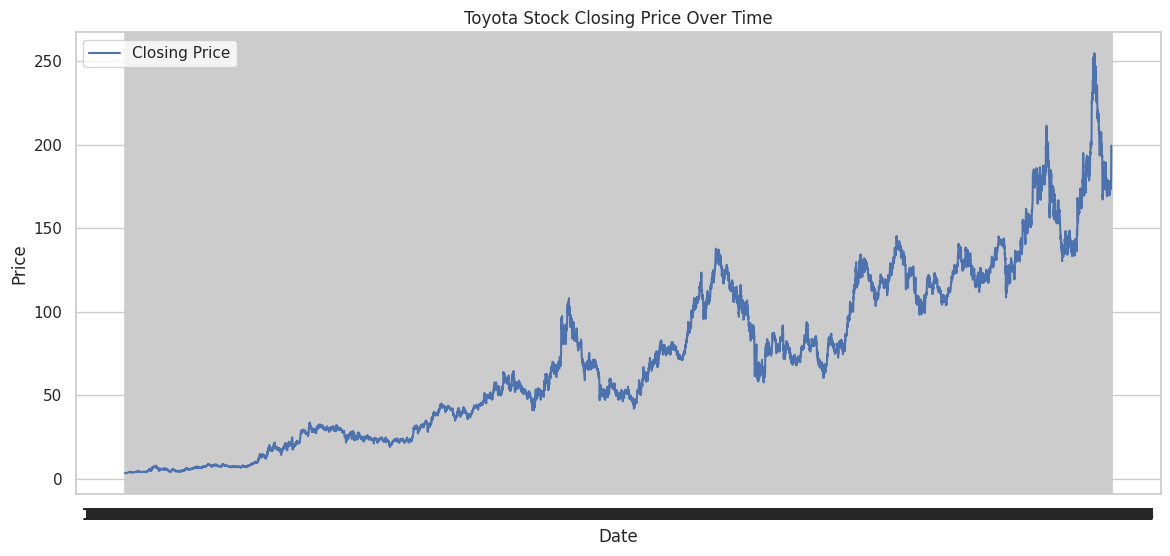

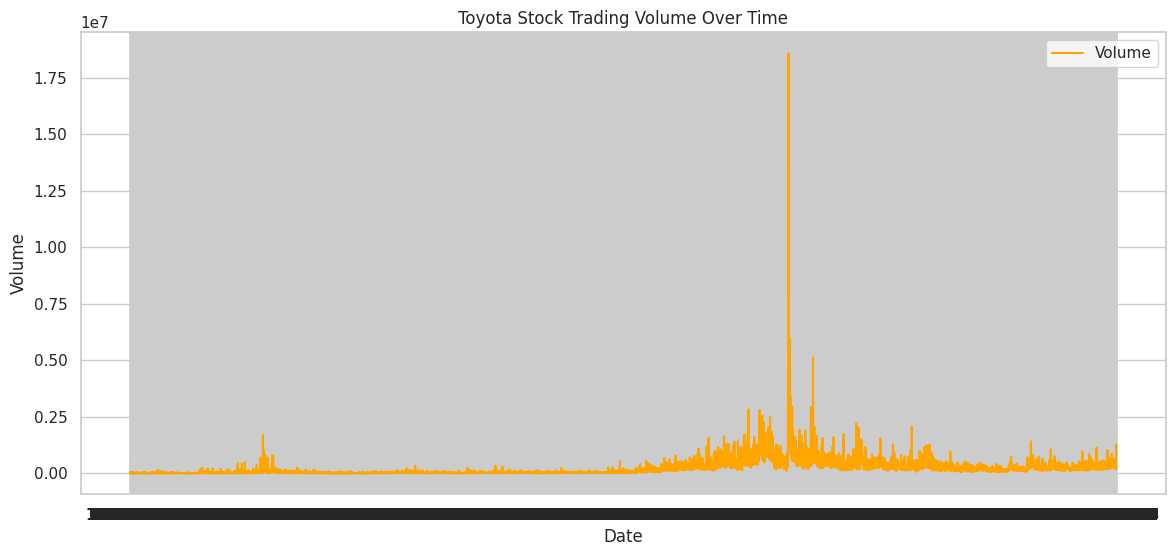

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot stock price over time
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Toyota Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot volume over time
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Toyota Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB


## Verifying Null values

In [4]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

## Converte the date column to date time

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11291 non-null  datetime64[ns]
 1   Adj Close  11291 non-null  float64       
 2   Close      11291 non-null  float64       
 3   High       11291 non-null  float64       
 4   Low        11291 non-null  float64       
 5   Open       11291 non-null  float64       
 6   Volume     11291 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 617.6 KB


In [7]:

df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,11291,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04
mean,2002-07-28 16:48:32.904082944,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05
min,1980-03-17 00:00:00,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,1991-05-15 12:00:00,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04
50%,2002-07-25 00:00:00,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04
75%,2013-10-09 12:00:00,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05
max,2024-12-27 00:00:00,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07
std,NaN,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05


## Displaying 


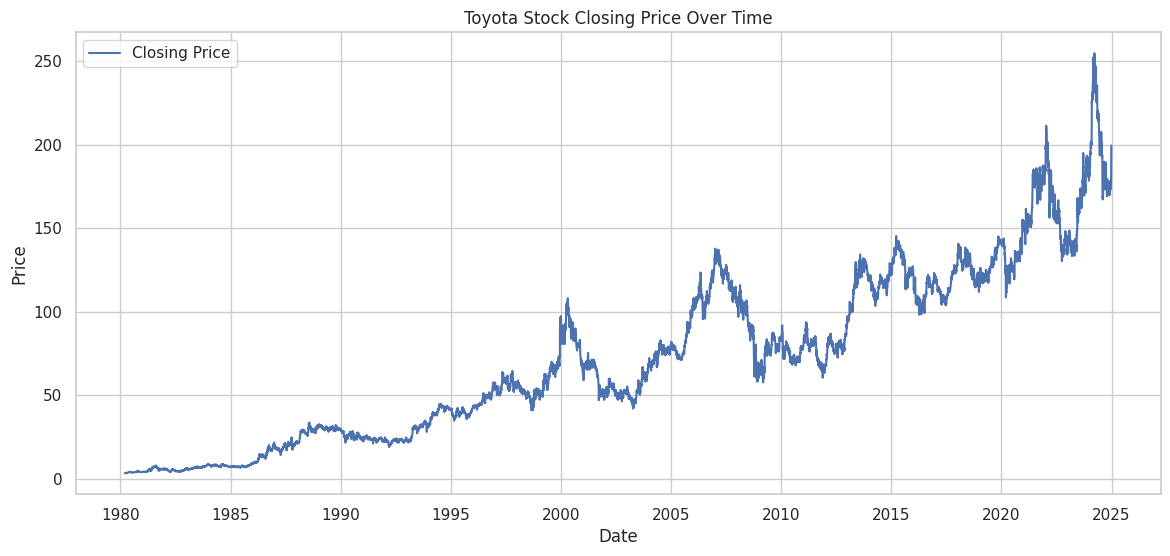

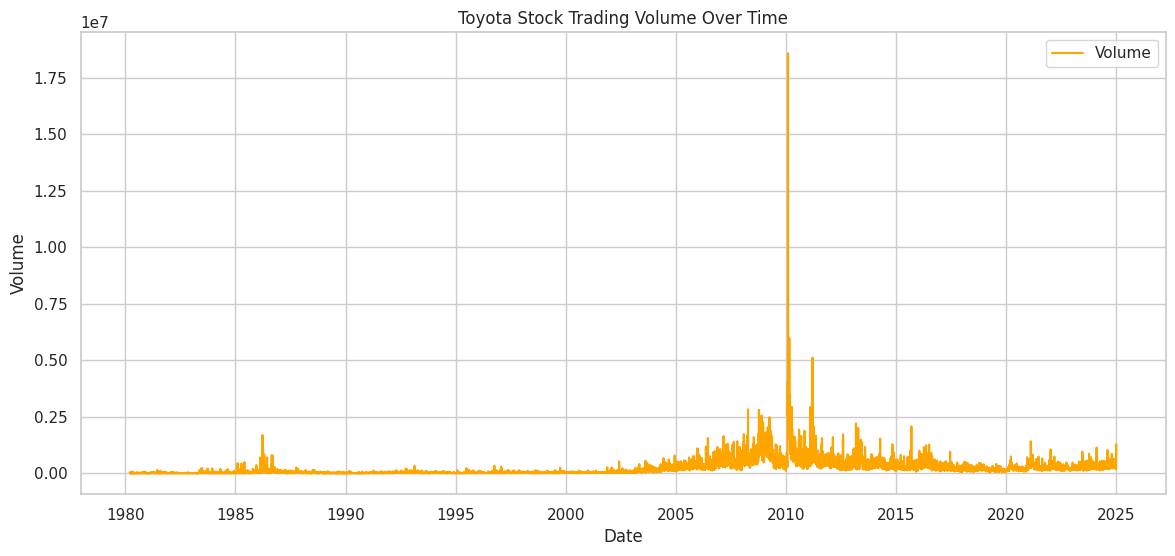

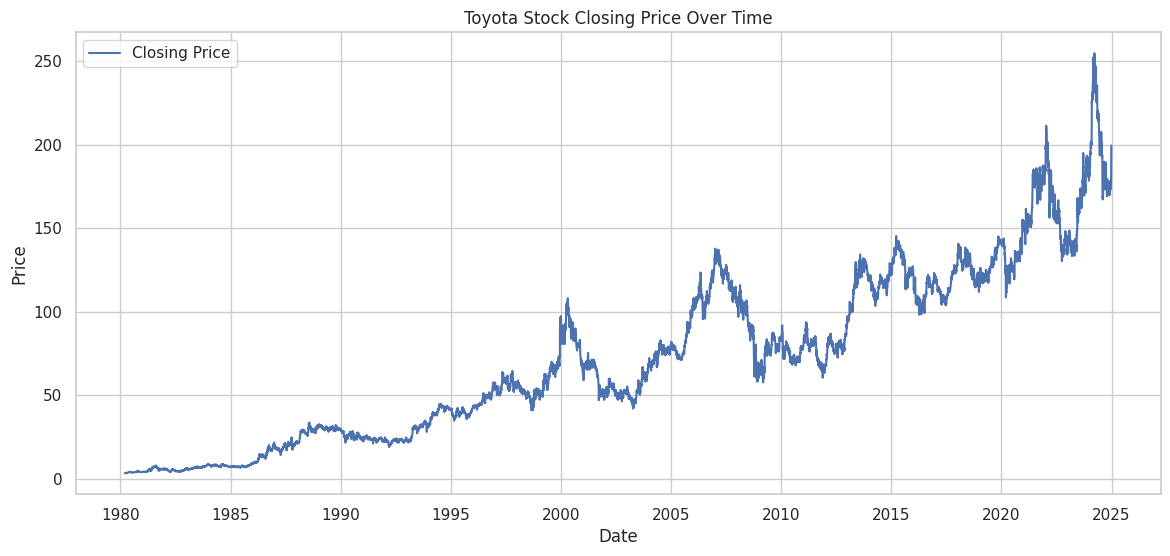

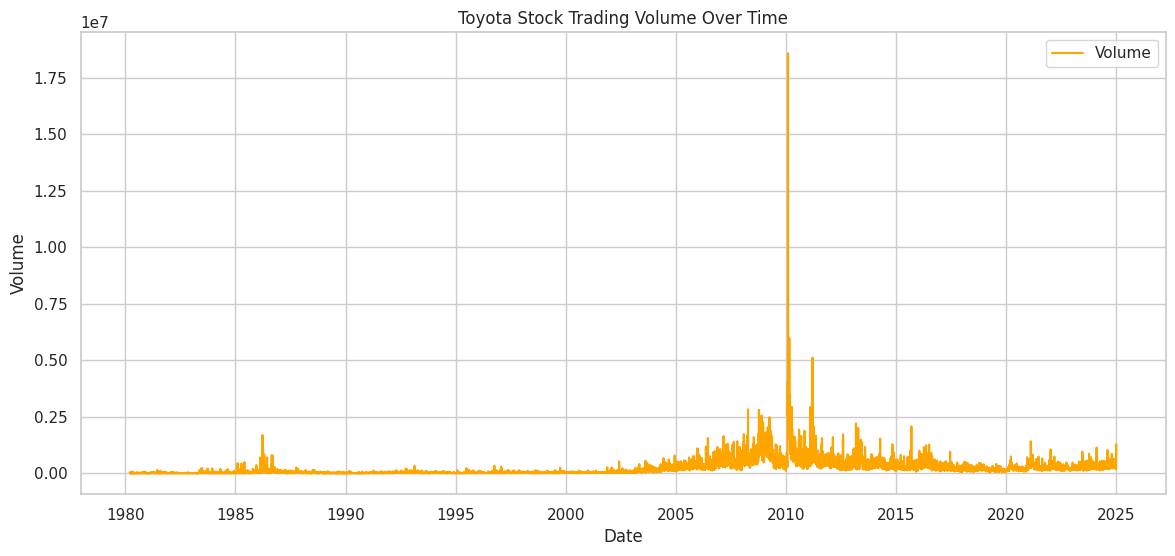

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot stock import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot stock price over time
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Toyota Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot volume over time
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Toyota Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Toyota Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot volume over time
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Toyota Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


## Removing Outlayers using Z-Score method


In [9]:
from scipy import stats
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
numeric_cols = [col for col in df.columns if col != 'Date']

# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Keep rows where all Z-scores < 3 (common threshold)
df_clean = df[(z_scores < 3).all(axis=1)]


df_clean.drop_duplicates(inplace=True)
df_clean.reset_index(drop=True, inplace=True)
df_clean.drop('Adj Close', axis=1, inplace=True)

/tmp/ipykernel_15748/1924218058.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(inplace=True)
/tmp/ipykernel_15748/1924218058.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('Adj Close', axis=1, inplace=True)


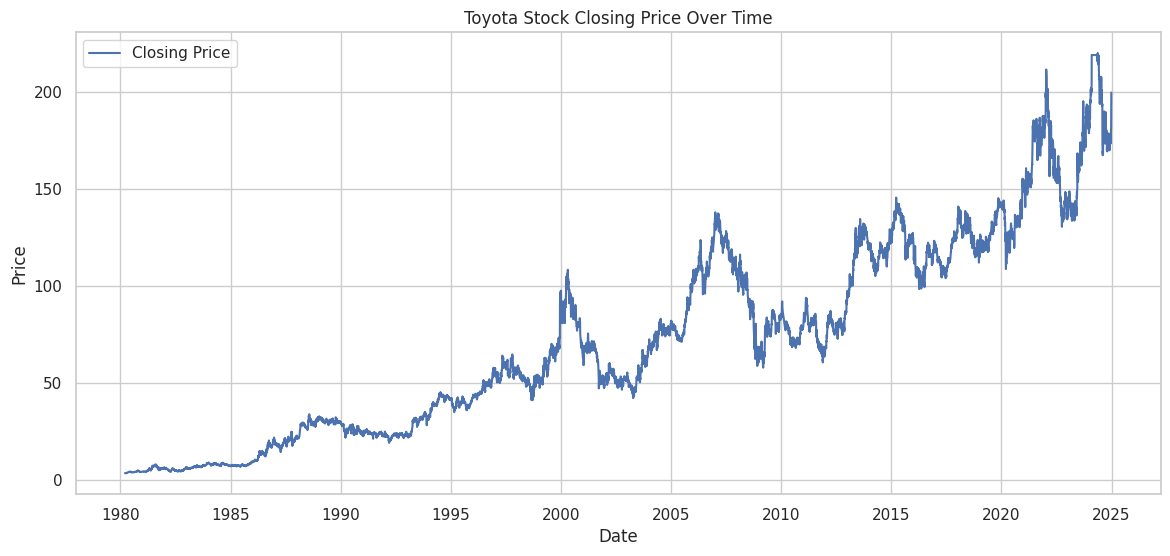

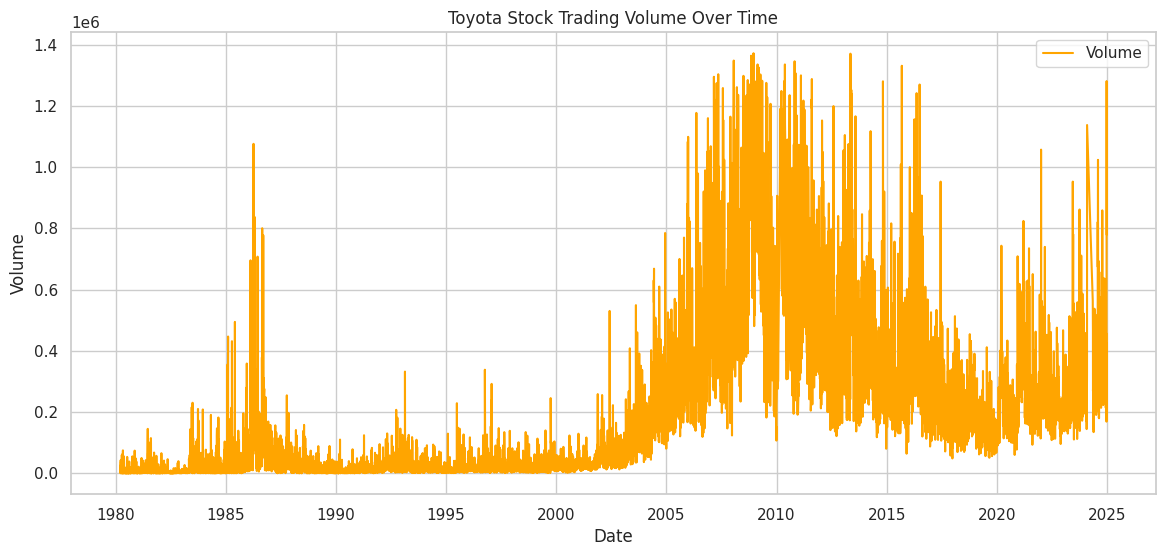

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot stock price over time
plt.figure(figsize=(14,6))
plt.plot(df_clean['Date'], df_clean['Close'], label='Closing Price')
plt.title('Toyota Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot volume over time
plt.figure(figsize=(14,6))
plt.plot(df_clean['Date'], df_clean['Volume'], label='Volume', color='orange')
plt.title('Toyota Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [11]:
df_clean.to_csv("../data/cleaned/toyota_stock.csv",index=False)

In [12]:
df_clean.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')